In [ ]:
#Create a GAN that can generate hand-written images of digits (0-9)

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm

In [ ]:
help(tqdm)

Help on class tqdm_notebook in module tqdm.notebook:

class tqdm_notebook(tqdm.std.tqdm)
 |  tqdm_notebook(*args, **kwargs)
 |  
 |  Experimental IPython/Jupyter Notebook widget using tqdm!
 |  
 |  Method resolution order:
 |      tqdm_notebook
 |      tqdm.std.tqdm
 |      tqdm.utils.Comparable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Parameters
 |      ----------
 |      iterable  : iterable, optional
 |          Iterable to decorate with a progressbar.
 |          Leave blank to manually manage the updates.
 |      desc  : str, optional
 |          Prefix for the progressbar.
 |      total  : int or float, optional
 |          The number of expected iterations. If unspecified,
 |          len(iterable) is used if possible. If float("inf") or as a last
 |          resort, only basic progress statistics are displayed
 |          (no ETA, no progressbar).
 |          If `gui` is True and this parameter needs subsequent upd

In [ ]:
from torchvision import transforms
from torchvision.datasets import  MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [ ]:
MNIST

torchvision.datasets.mnist.MNIST

In [ ]:
mnist_trainset=MNIST(root='./data',train=True,download=True,transform=None)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(mnist_trainset)

60000

In [ ]:
examples=enumerate(mnist_trainset)
batch_idx=(example_data,example_targets)=next(examples)

In [ ]:
batch_size_train = 64
batch_size_test = 1000
train_loader = DataLoader(MNIST('/files/', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])), batch_size=batch_size_train, shuffle=True)

test_loader = DataLoader(MNIST('/files/', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])), batch_size=batch_size_test ,shuffle=True)

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape

torch.Size([1000, 1, 28, 28])

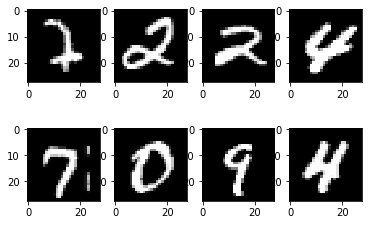

In [ ]:
fig=plt.figure()
for i in range(8):
  plt.subplot(2,4,i+1)
  #plt.tight_layout()
  plt.imshow(example_data[i][0],cmap='gray',interpolation='none')

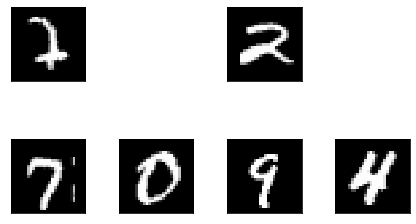

In [ ]:
fig=plt.figure()
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0],cmap='gray',interpolation='none')
  plt.xticks([])
  plt.yticks([])

### **Create generator for the GAN**

In [ ]:
def get_generator_block(input_dim,output_dim):
  return nn.Sequential(
      nn.Linear(input_dim,output_dim),
      nn.BatchNorm1d(output_dim),
      nn.ReLU(inplace=True)
  )

In [ ]:
def test_gen_block(in_features, out_features, num_test=1000):
    block = get_generator_block(in_features, out_features)

    # Check the three parts
    assert len(block) == 3
    assert type(block[0]) == nn.Linear
    assert type(block[1]) == nn.BatchNorm1d
    assert type(block[2]) == nn.ReLU
    
    # Check the output shape
    test_input = torch.randn(num_test, in_features)
    test_output = block(test_input)
    assert tuple(test_output.shape) == (num_test, out_features)
    assert test_output.std() > 0.55
    assert test_output.std() < 0.65

test_gen_block(25, 12)
test_gen_block(15, 28)
print("Success!")

Success!
